### 무작위 데이터(python, numpy)

In [8]:
import random
random.seed(3)
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.23796462709189137
2nd random number on the basis of the seed 0.5442292252959519


In [9]:
import numpy as np
print (np.random.random((3,2)))

[[0.37868156 0.53208542]
 [0.73832253 0.68722046]
 [0.05492026 0.8746464 ]]


### 분포에서 무작위 수

분포를 가정하고, 무작위 표본 Sample을 추출할 수 있다.
* numpy.random.rand는 **균등분포**
* numpy.random.randn은 **표준정규분포** (평균 $\mu=0$, 표준편차 $\sigma=1$)에서 샘플을 추출한다.

In [57]:
#표준 정규 분포
np.random.randn()

1.154175223142146

np.random.random_sample, random.sample 모두 **균등분포**에서 표본을 추출한다.

In [55]:
# 균등분포 
print (np.random.random_sample( (3,2) ))

[[0.54622928 0.23726023]
 [0.07606718 0.78346059]
 [0.04131723 0.56303612]]


### 범위 안에서 무작위

In [11]:
import random
print (random.sample([1,2,3,4,6], 2))
print (random.sample([1,2,3,4,6], 3))

[3, 4]
[6, 1, 3]


## S.4 균등 분포

Dice 1: 20회
Dice 2: 20회
Dice 3: 15회
Dice 4: 20회
Dice 5: 12회
Dice 6: 13회


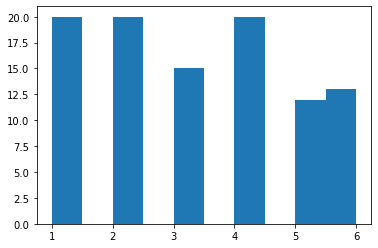

In [69]:
# randmo sampling
#샘플링 
dice=[]
for i in range(100):
   dice.append(random.randrange(1,6+1))

for i in range(1,7):
   print("Dice {}: {}회".format(i, dice.count(i)))

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(dice)
plt.show()

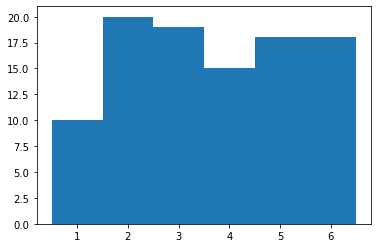

In [156]:
dice = []
for i in range(100):
    dice.append(random.randrange(1,6+1))

import numpy as np
#x축 숫자 그래프 가운대로 옮기고 싶으면 0.5를 배치해
plt.hist(dice, bins = np.arange(0.5,7))
plt.show()

## pandas로 그리기

<AxesSubplot:>

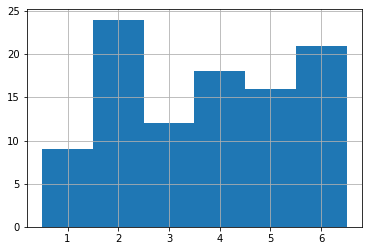

In [23]:
import pandas as pd
pd.Series(dice).hist(bins = np.arange(0.5, 7))

### describe (**기술통계량) -> 평균, 최소값, 최대값, 표준편차, 건수

In [24]:
import pandas as pd

s=pd.Series(dice)
print (s.describe())

count    100.000000
mean       3.710000
std        1.683521
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        6.000000
dtype: float64


## S.5 정규분포

평균 0, 표준편차 1을 가지는 정규분포에서 200개 샘플을 추출해보자.

(array([ 3.,  7.,  8., 13., 14., 24., 12., 11.,  4.,  4.]),
 array([-2.62840992, -2.10767546, -1.58694101, -1.06620656, -0.54547211,
        -0.02473766,  0.49599679,  1.01673124,  1.53746569,  2.05820014,
         2.57893459]),
 <BarContainer object of 10 artists>)

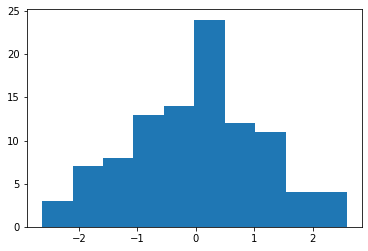

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
comp1=np.random.normal(0, 1, size=200)
comp2=np.random.normal(10, 2, size=200)

x=np.random.randn(100)
count, binends = np.histogram(x)

plt.hist(x)

### pandas로 그리기

<AxesSubplot:>

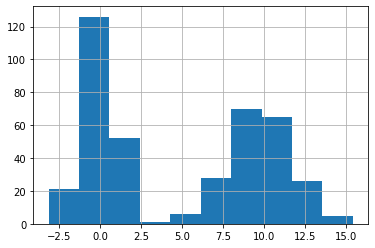

In [29]:
import pandas as pd

values=pd.Series(np.concatenate( [comp1,comp2]))
values.hist()

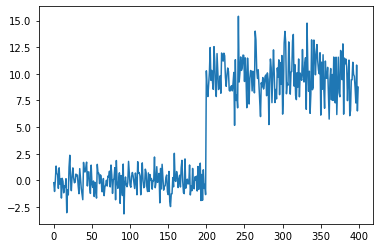

In [30]:
values.plot()
plt.show()

## S.6 중심극한정리

In [160]:
import numpy as np
x=np.random.randn(100)

정규분포는 평균, 모드, 최빈값이 같아야 한다.
아래는 평균은 0에 가깝고, 최빈값과 다소 차이가 있다.
정규분포의 솟거나, 퍼진 모양이 다르기 때문이다.

In [161]:
print ("mean\t: {}".format(np.mean(x)))
print ("median\t: {}".format(np.median(x)))

mean	: 0.15114378802423348
median	: 0.21980946671616386


### skewness (분포의 대칭성)

분포의 대칭성을 설명하는 지표로 skewness를 계산한다.
* ```= 0``` : 정규분포
* ```> 0``` : 왼쪽 꼬리가 두툼, 왼쪽으로 비스듬
* ```< 0``` : 오른쪽 꼬리가 두툼, 왼쪽으로 비스듬

In [162]:
from scipy.stats import skew

print ("skewness\t: {}".format(skew(x)))

skewness	: -0.19029375309212265


### kurtosis (분포의 뾰족한 정도)

kurtosis는 분포의 뾰족한 정도를 설명한다.
* ```= 0``` : 정규분포
* ```> 0``` : 뾰족하고, 꼬리가 두툼
* ```< 0``` : 편평하고, 꼬리가 얇음

In [163]:
from scipy.stats import kurtosis

print ("kurtosis\t: {}".format(kurtosis(x)))

kurtosis	: -0.2822453391494424


## S.7 분산


In [36]:
#평균 -> 라이브러리로 쉽게 합계 구함
X=x
print ("simple mean of x = {:.3f}".format(float(sum(X))/len(X)))

simple mean of x = 0.040


### numpy 평균

In [38]:
import numpy as np

xbar=np.mean(X)
#ybar=np.mean(Y)
print ("numpy mean of X = {:.3f}".format(xbar))


numpy mean of X = 0.040


### 분산 계산식

In [39]:
#x에서 xbar(평균 ) 뺀다
#자유도는 0
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/len(X))) # ddof=0

0.9272361498847824


In [40]:
#자유도는 1
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/(len(X)-1))) # ddof=1

0.931907394309565


### numpy 분산 계산

In [42]:
sx=np.sqrt(np.var(X,ddof=1))
#자유도 0, 1
print(np.std(X)) # ddof=0
print(np.std(X, ddof=1))

0.9272361498847823
0.9319073943095649


In [43]:
#percentile은 배열에서50% 즉 5개의 배열의 중간 인덱스의 값을 리턴
a = np.array([1,2,3,4,5])
p = np.percentile(a, 50) # return 50th percentile, e.g median.
print (p) # 3


3.0


### boxplot

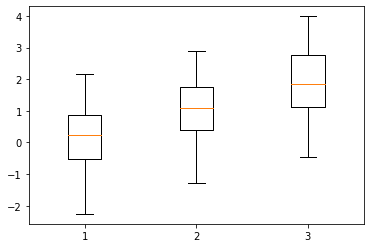

In [44]:
import matplotlib.pyplot as plt

x1 = np.random.normal(0,1,50) # mu=0, sigma=1, n=50
x2 = np.random.normal(1,1,50)
x3 = np.random.normal(2,1,50)
plt.boxplot([x1,x2,x3])
plt.show()

## S.8 zscore, tscore
zscore -> 평균에서 표준편차의 몇배가 떨어져 있는지? 각 값 - 평균 / 표준편차

tscore -> 

In [164]:
X=[10, 7, 12, 12, 9, 16, 12, 18, 8, 12, 14, 16]

#zscore계산식 
import numpy as np
#x의 평균 구해 
xbar=np.mean(X)
#np함수 통해 시그마를 구한다(분산)
sigmax=np.std(X) #ddof=0
#np함수 통해 자유도가 1인 시그마를 구한다. 
sx=np.std(X,ddof=1)

# 평균에서 점수를 빼고난뒤 표준편차로 나눈 모슴 
for x in X:
   zscore=(x-xbar)/sx
   print (zscore, end= ' ')

-0.6410300618768864 -1.5286101475525755 -0.04931000475976033 -0.04931000475976033 -0.9368900904354495 1.1341301094744918 -0.04931000475976033 1.725850166591618 -1.2327501189940124 -0.04931000475976033 0.5424100523573657 1.1341301094744918 

### 라이브러리 이용한 zscore 쉽게 구하기

In [46]:
from scipy import stats
stats.zscore(X)

array([-0.66953406, -1.59658123, -0.05150262, -0.05150262, -0.97854978,
        1.18456027, -0.05150262,  1.80259171, -1.28756551, -0.05150262,
        0.56652882,  1.18456027])

### cdf (누적확률)
**평균과 표준편차는 0,1을 기본 값** 으로 함

Ex) cdf(0)은 '0'또는 그 이하의 값을 누적한 확률 

In [47]:
from scipy.stats import norm
#loc는 평균 scale은 표준편차
norm.cdf(0, loc=0, scale=1)

0.5

1일 경우는 84.13, 2일 경우에는 97.72이다.
* $\mu \pm 1\sigma$ 모집단 68.27%
* $\mu \pm 2\sigma$ 모집단 95.45%
* $\mu \pm 3\sigma$ 모집단 99.73%

In [48]:
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859

In [49]:
norm.cdf(2) - norm.cdf(-2)

0.9544997361036416

### n이 작을때 cdf구하기 위해서는 t분포를 사용해야한다. 

In [50]:
from scipy.stats import t

t.cdf(1, 1) # dof 1

0.7500000000000002

In [51]:
t.cdf(1, 1, loc=0, scale=1)

0.7500000000000002

## S.9 outliers 중요!!
이상값이 있는지 판단하기

3시그마를 벗어낫을때 이산값

In [52]:
import numpy as np

def reject_outliers(data):
    m = np.mean(data)
    s = np.std(data)
    #여기서는 outlier을 2를넘을때이다. 보통 
    filtered = [d for d in data if (m - 2 * s < d < m + 2 * s)]
    return filtered

d = [2,4,5,1,6,5,40]
filtered_d = reject_outliers(d)
print (filtered_d)

[2, 4, 5, 1, 6, 5]
